In [10]:
import os

str1_dir = os.getcwd()


In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data import create_synthetic_multi

Synthetic Data Summary
Generated 4 ETFs:
  HYG: Close range [82.07, 101.79], NAV premium range [-0.018, 0.017]
  JNK: Close range [32.68, 41.00], NAV premium range [-0.019, 0.018]
  LQD: Close range [97.27, 112.85], NAV premium range [-0.020, 0.016]
  VCIT: Close range [86.54, 96.67], NAV premium range [-0.020, 0.020]

Generated 2 CDX indices:
  HY: Spread range [349.0, 380.1] bp, Basis range [-3.64, 5.57] bp
  IG: Spread range [79.8, 96.6] bp, Basis range [-2.18, 3.34] bp


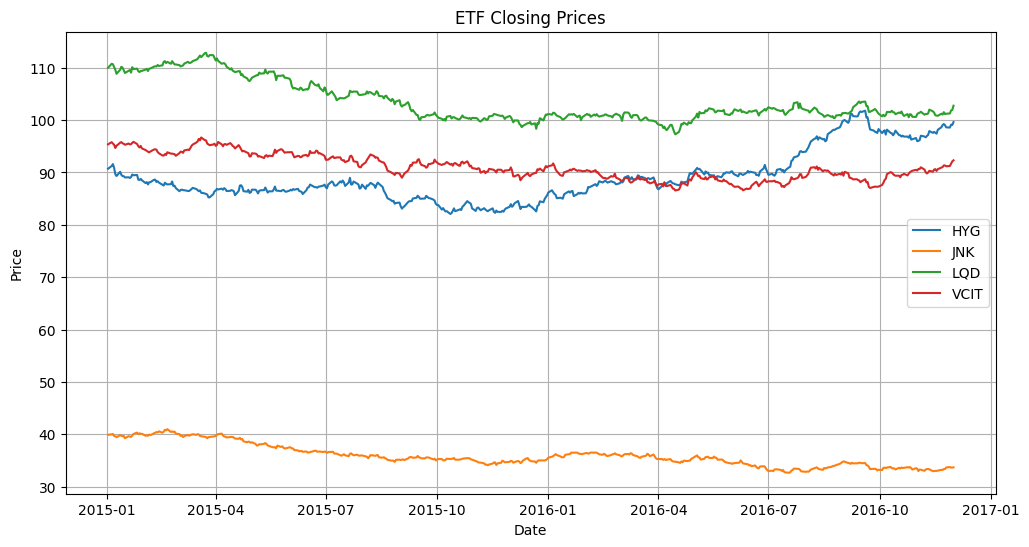

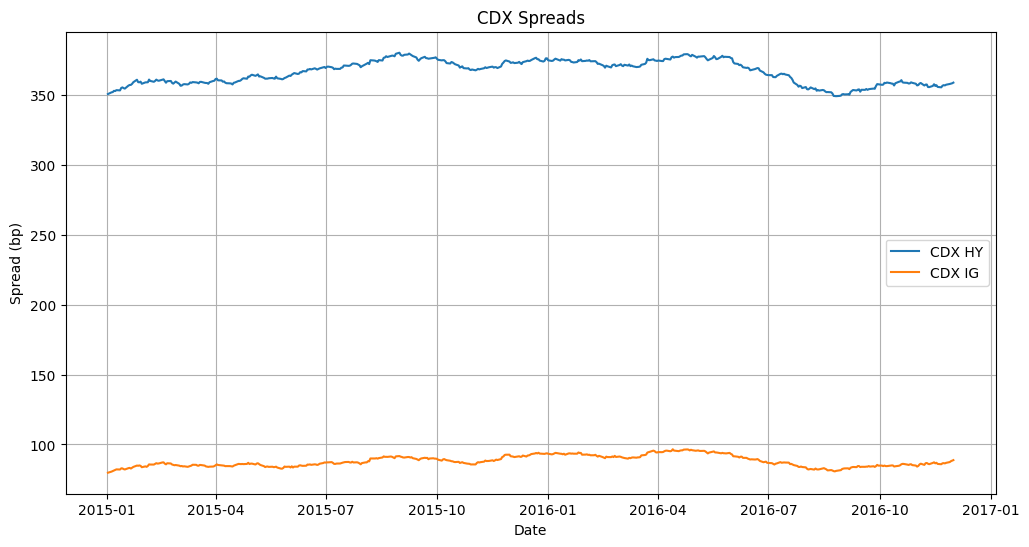

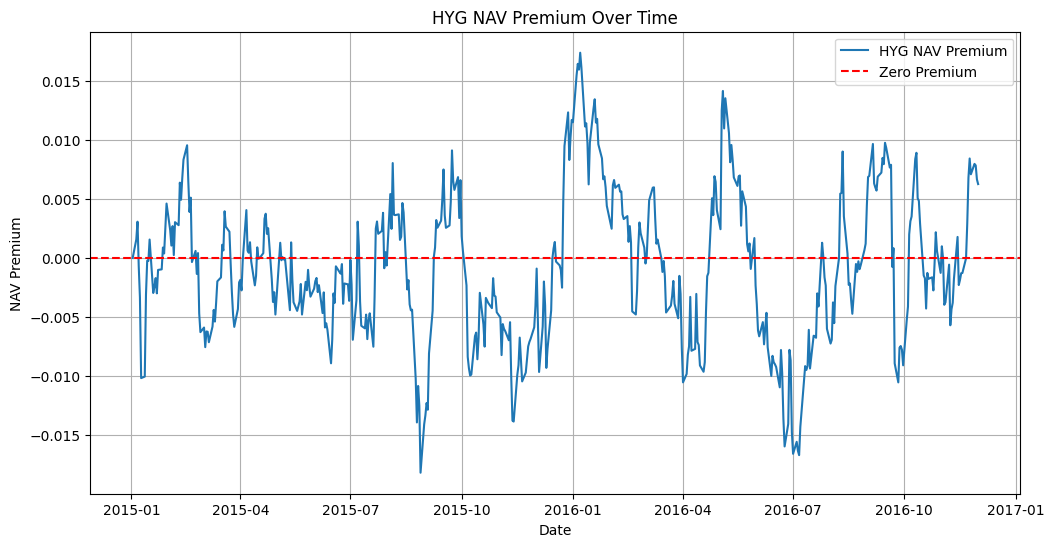


HYG vs CDX HY Correlation: -0.040


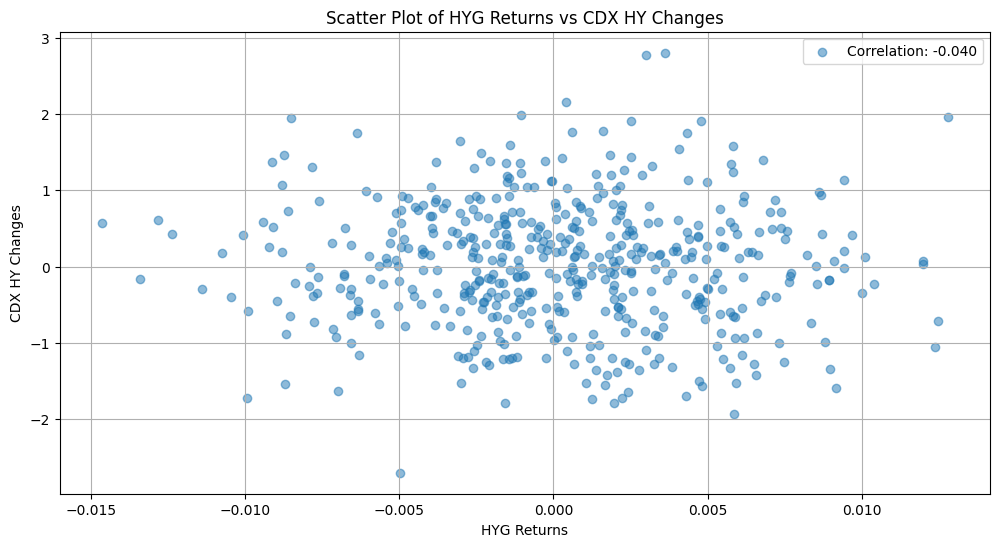

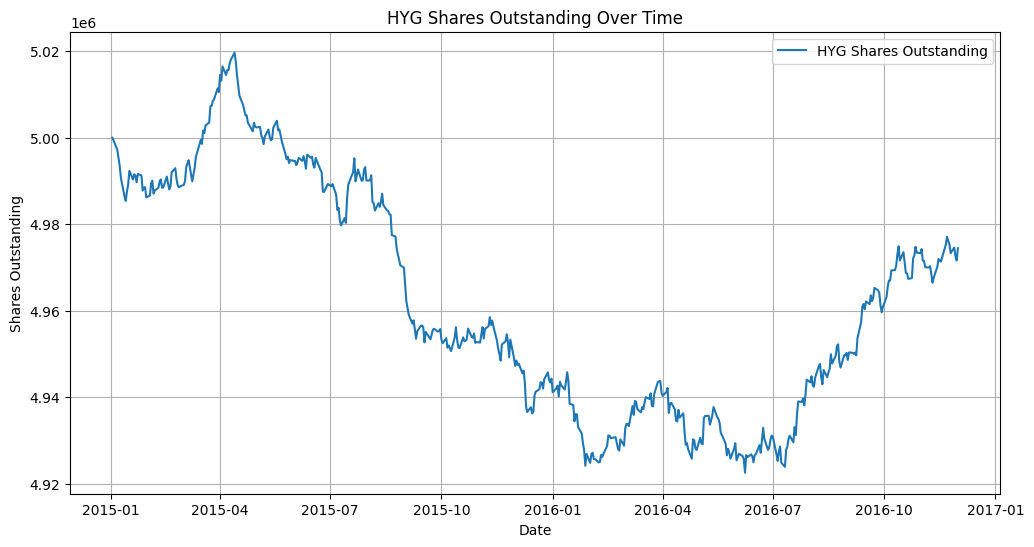

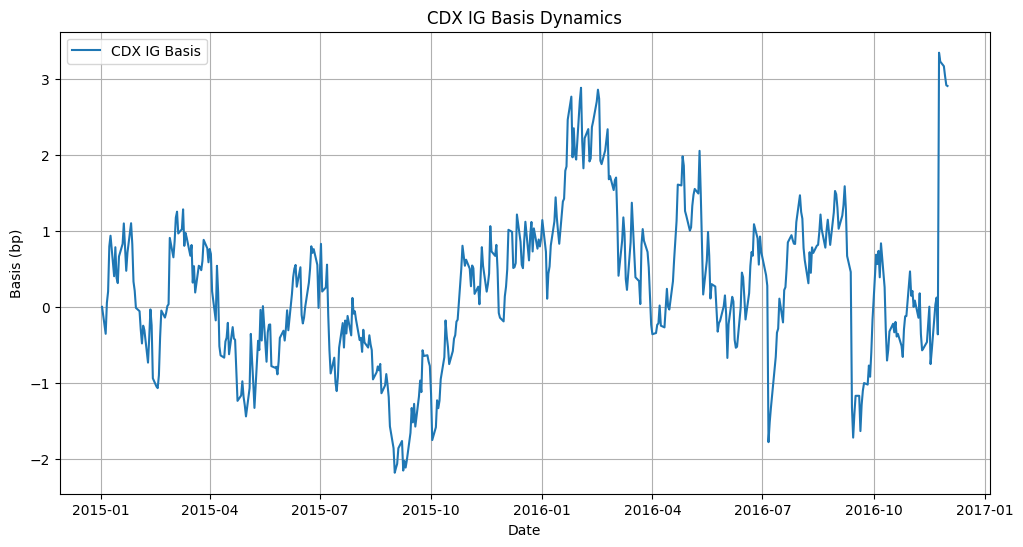

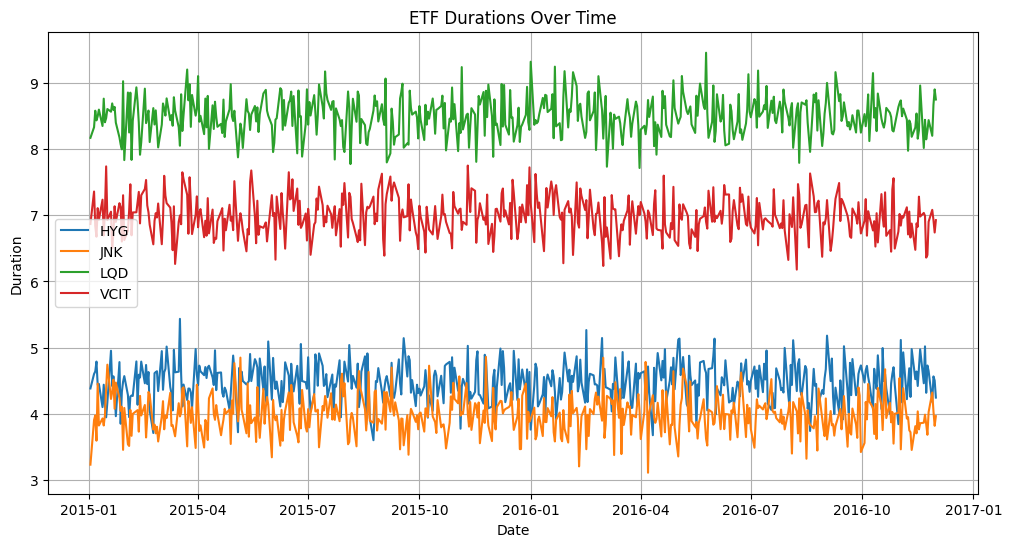


Synthetic data generation and analysis complete!


In [12]:

# Ensure inline plots for Jupyter Notebook
%matplotlib inline

# Set global plot configuration
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.grid"] = True

# Generate synthetic data
n_days = 500  # Number of trading days for the example
seed = 42     # Random seed for reproducibility
assets, cdx = create_synthetic_multi(n_days=n_days, seed=seed)

# Display summary of generated data
print("Synthetic Data Summary")
print("=" * 40)
print(f"Generated {len(assets)} ETFs:")
for name, df in assets.items():
    print(
        f"  {name}: Close range [{df['close'].min():.2f}, {df['close'].max():.2f}], "
        f"NAV premium range [{df['nav'].div(df['close']).sub(1).min():.3f}, "
        f"{df['nav'].div(df['close']).sub(1).max():.3f}]"
    )

print(f"\nGenerated {len(cdx)} CDX indices:")
for name, df in cdx.items():
    print(
        f"  {name}: Spread range [{df['spread'].min():.1f}, {df['spread'].max():.1f}] bp, "
        f"Basis range [{df['index_basis'].min():.2f}, {df['index_basis'].max():.2f}] bp"
    )

# Plot ETF closing prices
plt.figure()
for name, df in assets.items():
    plt.plot(df["close"], label=name)
plt.title("ETF Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot CDX spreads
plt.figure()
for name, df in cdx.items():
    plt.plot(df["spread"], label=f"CDX {name}")
plt.title("CDX Spreads")
plt.xlabel("Date")
plt.ylabel("Spread (bp)")
plt.legend()
plt.show()

# Plot NAV premium for a specific ETF (e.g., HYG)
plt.figure()
hyg_nav_premium = assets["HYG"]["nav"].div(assets["HYG"]["close"]).sub(1)
plt.plot(hyg_nav_premium, label="HYG NAV Premium")
plt.axhline(0, color="red", linestyle="--", label="Zero Premium")
plt.title("HYG NAV Premium Over Time")
plt.xlabel("Date")
plt.ylabel("NAV Premium")
plt.legend()
plt.show()

# Example: Analyze correlation between HYG returns and CDX HY changes
hyg_ret = assets["HYG"]["close"].pct_change().dropna()
cdx_hy_ret = cdx["HY"]["spread"].diff().dropna()
common_idx = hyg_ret.index.intersection(cdx_hy_ret.index)

if len(common_idx) > 0:
    correlation = hyg_ret.loc[common_idx].corr(cdx_hy_ret.loc[common_idx])
    print(f"\nHYG vs CDX HY Correlation: {correlation:.3f}")

    # Scatter plot of returns
    plt.figure()
    plt.scatter(
        hyg_ret.loc[common_idx], 
        cdx_hy_ret.loc[common_idx], 
        alpha=0.5, 
        label=f"Correlation: {correlation:.3f}"
    )
    plt.title("Scatter Plot of HYG Returns vs CDX HY Changes")
    plt.xlabel("HYG Returns")
    plt.ylabel("CDX HY Changes")
    plt.legend()
    plt.show()

# Example: Analyze HYG share outstanding over time
plt.figure()
plt.plot(assets["HYG"]["so"], label="HYG Shares Outstanding")
plt.title("HYG Shares Outstanding Over Time")
plt.xlabel("Date")
plt.ylabel("Shares Outstanding")
plt.legend()
plt.show()

# Example: Analyze CDX IG basis dynamics
plt.figure()
plt.plot(cdx["IG"]["index_basis"], label="CDX IG Basis")
plt.title("CDX IG Basis Dynamics")
plt.xlabel("Date")
plt.ylabel("Basis (bp)")
plt.legend()
plt.show()

# Additional Example: Compare durations of ETFs
plt.figure()
for name, df in assets.items():
    plt.plot(df["duration"], label=name)
plt.title("ETF Durations Over Time")
plt.xlabel("Date")
plt.ylabel("Duration")
plt.legend()
plt.show()

# Conclusion
print("\nSynthetic data generation and analysis complete!")